In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import urllib3
import requests
import zipfile

In [2]:
#Defin todays URL
url = 'https://files.ssi.dk/Data-Epidemiologiske-Rapport-30102020-pc29'

# Direct download and unpacking
r = requests.get(url, allow_redirects=True)
open('data.zip', 'wb').write(r.content)

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall("data/")


In [3]:
#datafolder=Path("C:/Users/boj/Downloads/Data-Epidemiologiske-Rapport-30102020-pc29")
datafolder=Path("data/")
from_date='2020-08-1'
title_str='SSI COVID-19 data, tilfælde opgjort på prøvetagningsdato'

In [4]:
datafile=datafolder / "Test_pos_over_time.csv"

In [5]:
# this is nice, skips bad lines (which does not convert to date) and converts index to date
#Notice BAD danish format of the numbers
df=pd.read_csv(datafile,  sep=';', parse_dates=['Date'], index_col=['Date'],error_bad_lines=False, skipfooter=2,decimal=',',thousands='.')

#df.drop(df.tail(2).index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#ikke så elegant løsning
#df = pd.read_csv(datafile, sep=';')
#df.drop(df.tail(2).index,inplace=True) # drop last n rows
#df['Date']=pd.to_datetime(df['Date']) # convert dates to datetime
#df=df.set_index('Date')

In [7]:
# calculate relevant numbers
def calcScaledNumber (row):
    if row.NotPrevPos > 0 :
        return row.NewPositive / row.NotPrevPos**0.7
    else:
        return 0
    
    
# calculate relevant numbers
def calcPosPct (row):
    if row.NotPrevPos > 0 :
        return row.NewPositive / row.NotPrevPos * 100
    else:
        return 0

df['ScaledNumber']=df.apply(lambda row: calcScaledNumber(row), axis=1)

df['PosPct']=df.apply(lambda row: calcPosPct(row), axis=1)


<IPython.core.display.Javascript object>


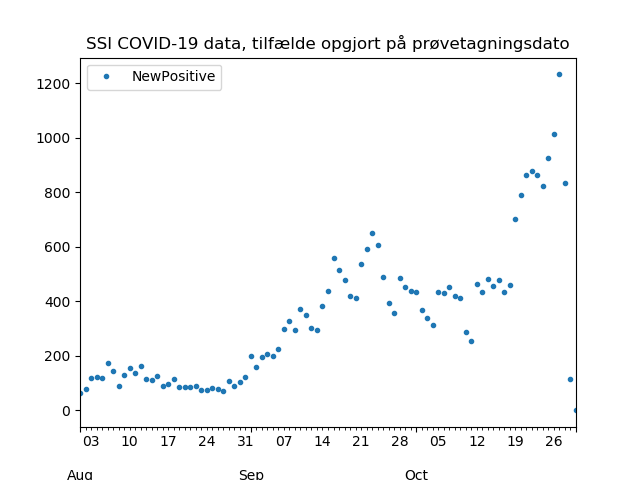

In [8]:
df[from_date:].plot(y='NewPositive',title=title_str,style='.')

<IPython.core.display.Javascript object>


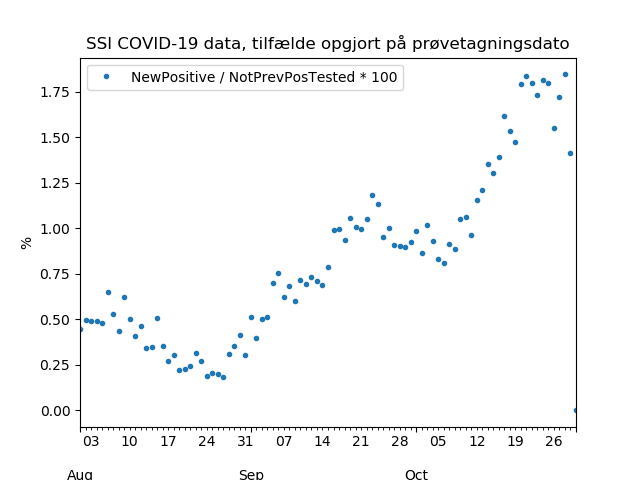

Text(0, 0.5, '%')

In [9]:
ax=df[from_date:].plot(y='PosPct',title=title_str,label='NewPositive / NotPrevPosTested * 100',style='.')
ax.set_ylabel("%")

<IPython.core.display.Javascript object>


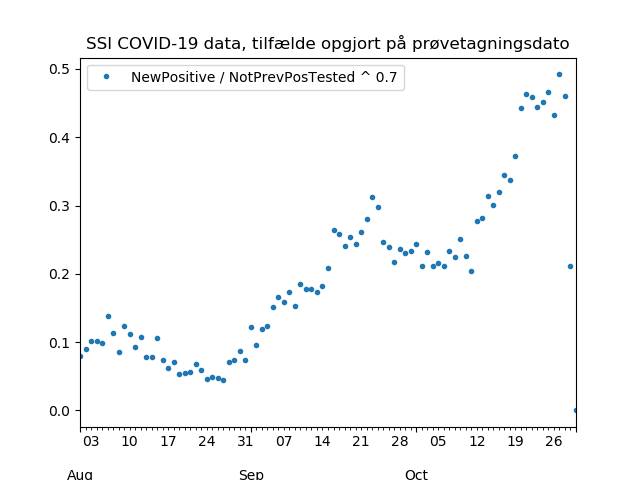

In [10]:
df[from_date:].plot(y='ScaledNumber',title=title_str,label='NewPositive / NotPrevPosTested ^ 0.7',style='.')